In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import learning_curve

# **WINE DATASET**

In [ ]:
from sklearn.datasets import load_wine

wine = load_wine()

In [ ]:
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target
df['target'] = df['target'].apply(lambda x: wine.target_names[x])
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,class_2


In [ ]:
column_counts = df['target'].value_counts()
print(column_counts)

target
class_1    71
class_0    59
class_2    48
Name: count, dtype: int64


In [ ]:
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
classifier = RandomForestClassifier()

classifier.fit(X_train, y_train)

# Evaluate on test set
y_pred = classifier.predict(X_test)

print("\nConfusion Matrix")
print(confusion_matrix(y_test, y_pred))

print("------------------------------------------------------")
print("Classification Report")
print(classification_report(y_test, y_pred, target_names=wine.target_names))


Confusion Matrix
[[18  1  0]
 [ 0 22  0]
 [ 0  0 13]]
------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

     class_0       1.00      0.95      0.97        19
     class_1       0.96      1.00      0.98        22
     class_2       1.00      1.00      1.00        13

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [ ]:
classifier = RandomForestClassifier()

param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    # 'max_depth': [2, 3, 4, 5, 6],
    # 'min_samples_split': [2, 3, 4, 5],
    # 'min_samples_leaf': [1, 2, 3, 4, 5],
    # 'max_leaf_nodes': [2,3,4,5,6,7],
    # 'max_features': [None, 'sqrt', 'log2']
}

# Grid search
grid = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Best model
best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

y_pred = best_model.predict(X_test)

print("\nConfusion Matrix")
print(confusion_matrix(y_test, y_pred))

print("------------------------------------------------------")
print("Classification Report")
print(classification_report(y_test, y_pred, target_names=wine.target_names))

Best Parameters: {'criterion': 'gini', 'max_depth': 3}

Confusion Matrix
[[18  1  0]
 [ 0 21  1]
 [ 0  0 13]]
------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

     class_0       1.00      0.95      0.97        19
     class_1       0.95      0.95      0.95        22
     class_2       0.93      1.00      0.96        13

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.96      0.96      0.96        54



**Visualisations**


=== Train-Test Split: 50:50 ===
Best Parameters: {'criterion': 'gini'}
              precision    recall  f1-score   support

     class_0       0.97      1.00      0.98        30
     class_1       1.00      0.94      0.97        35
     class_2       0.96      1.00      0.98        24

    accuracy                           0.98        89
   macro avg       0.98      0.98      0.98        89
weighted avg       0.98      0.98      0.98        89



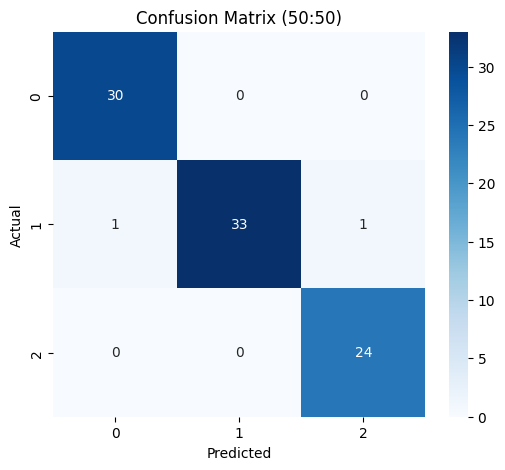

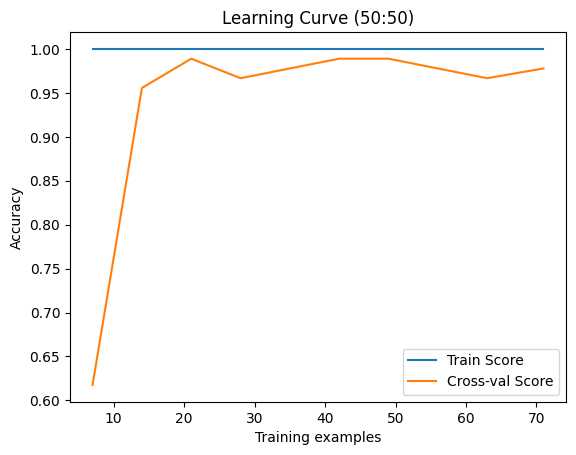

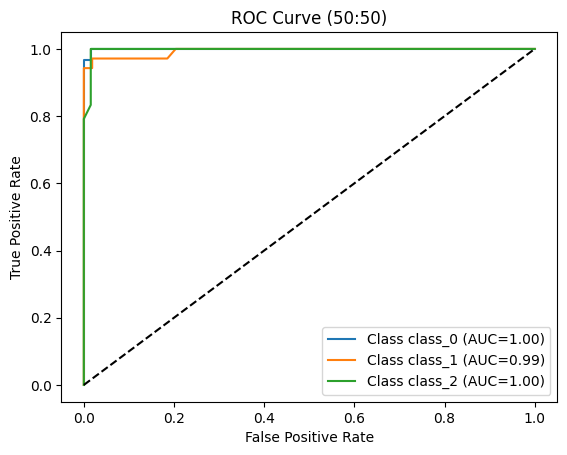


=== Train-Test Split: 60:40 ===
Best Parameters: {'criterion': 'gini'}
              precision    recall  f1-score   support

     class_0       0.96      1.00      0.98        24
     class_1       1.00      0.97      0.98        29
     class_2       1.00      1.00      1.00        19

    accuracy                           0.99        72
   macro avg       0.99      0.99      0.99        72
weighted avg       0.99      0.99      0.99        72



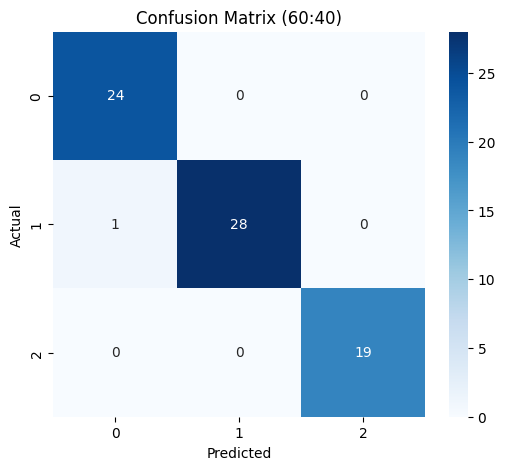

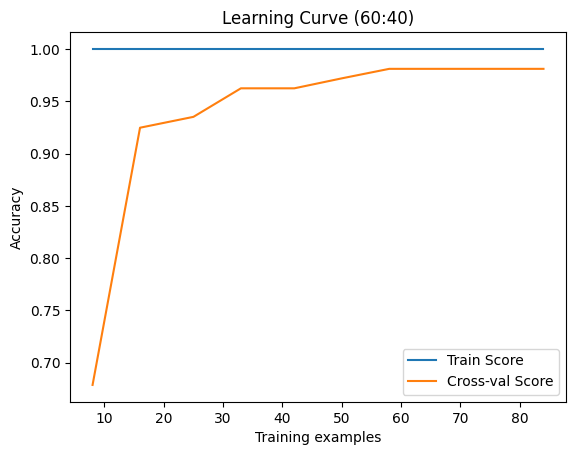

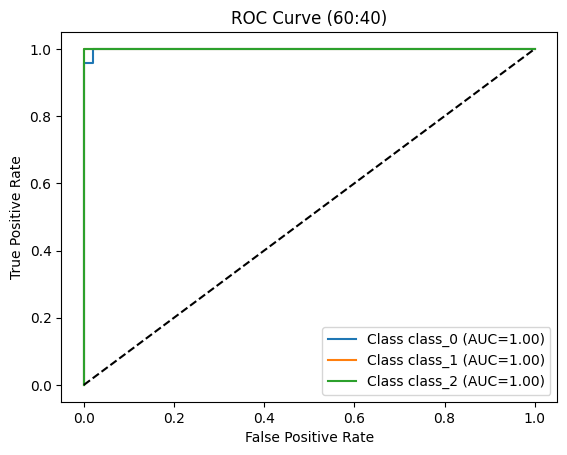


=== Train-Test Split: 70:30 ===
Best Parameters: {'criterion': 'entropy'}
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       1.00      1.00      1.00        21
     class_2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



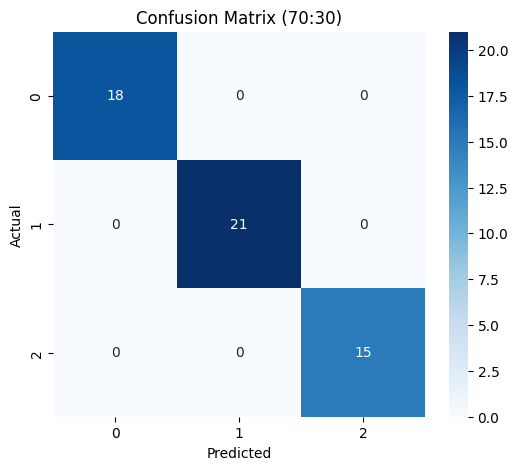

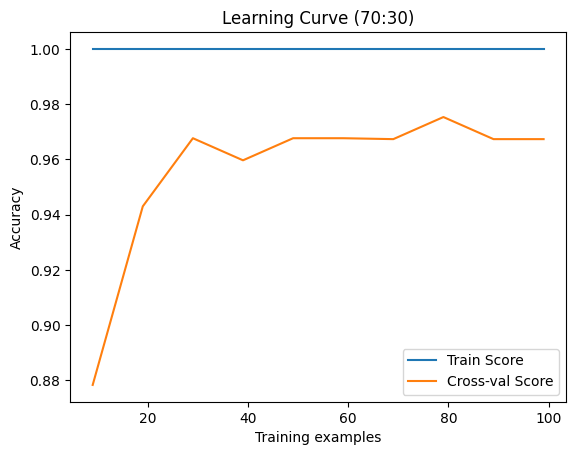

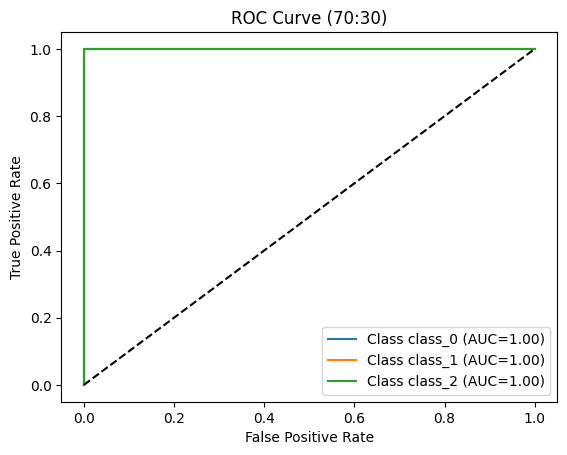


=== Train-Test Split: 80:20 ===
Best Parameters: {'criterion': 'gini'}
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



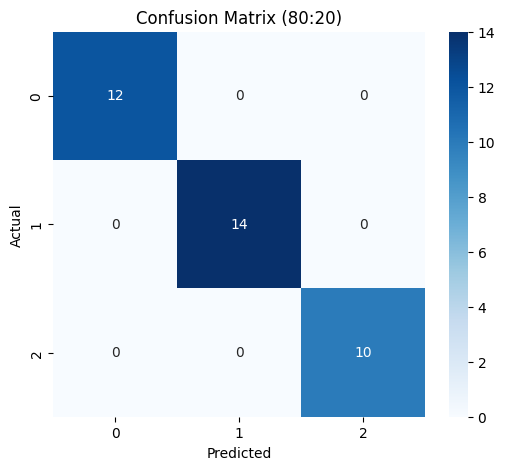

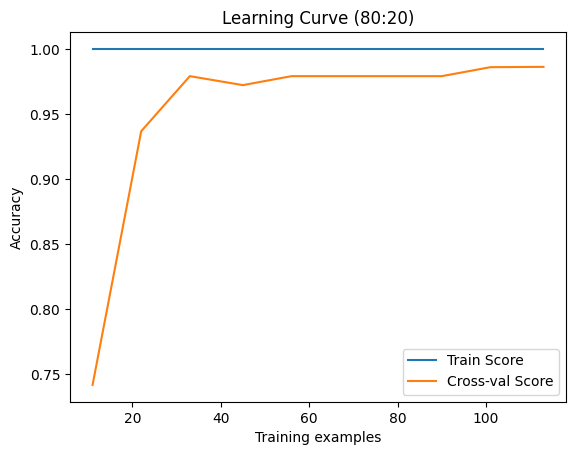

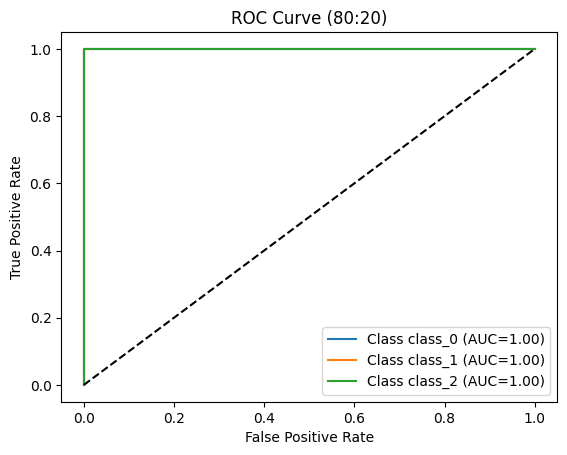

,Test Size,Accuracy,Precision,Recall,F1
0,0.5,0.977528,0.978340,0.977528,0.977404
1,0.4,0.986111,0.986667,0.986111,0.986131
2,0.3,1.000000,1.000000,1.000000,1.000000
3,0.2,1.000000,1.000000,1.000000,1.000000


In [ ]:
splits = [0.5, 0.4, 0.3, 0.2]
results = []

for test_size in splits:
    print(f"\n=== Train-Test Split: {int((1-test_size)*100)}:{int(test_size*100)} ===")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42, stratify=y
    )

    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    # Train
    rf = RandomForestClassifier(random_state=42)

    param_grid = {
        'criterion': ['gini', 'entropy', 'log_loss'],
        # 'max_depth': [2, 3, 4, 5, 6],
        # 'min_samples_split': [2, 3, 4, 5],
        # 'min_samples_leaf': [1, 2, 3, 4, 5],
        # 'max_leaf_nodes': [2,3,4,5,6,7],
        # 'max_features': [None, 'sqrt', 'log2']
    }

    grid = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    print("Best Parameters:", grid.best_params_)

    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="weighted")
    rec = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    results.append([test_size, acc, prec, rec, f1])

    print(classification_report(y_test, y_pred))

    # Confusion Matrix Heatmap
    plt.figure(figsize=(6,5))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix ({int((1-test_size)*100)}:{int(test_size*100)})")
    plt.xlabel("Predicted"); plt.ylabel("Actual")
    plt.show()

    # Learning Curve
    train_sizes, train_scores, test_scores = learning_curve(
        rf, X_train, y_train, cv=5, scoring="accuracy", n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10)
    )
    plt.figure()
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Train Score")
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Cross-val Score")
    plt.title(f"Learning Curve ({int((1-test_size)*100)}:{int(test_size*100)})")
    plt.xlabel("Training examples"); plt.ylabel("Accuracy")
    plt.legend(); plt.show()

    # ROC Curve
    fpr, tpr, roc_auc = {}, {}, {}
    for i, cls in enumerate(best_model.classes_):
        fpr[i], tpr[i], _ = roc_curve(y_test == cls, y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    for i, cls in enumerate(best_model.classes_):
        plt.plot(fpr[i], tpr[i], label=f"Class {cls} (AUC={roc_auc[i]:.2f})")
    plt.plot([0,1],[0,1],"k--")
    plt.title(f"ROC Curve ({int((1-test_size)*100)}:{int(test_size*100)})")
    plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
    plt.legend(); plt.show()

results_df = pd.DataFrame(results, columns=["Test Size", "Accuracy", "Precision", "Recall", "F1"])
display(results_df)


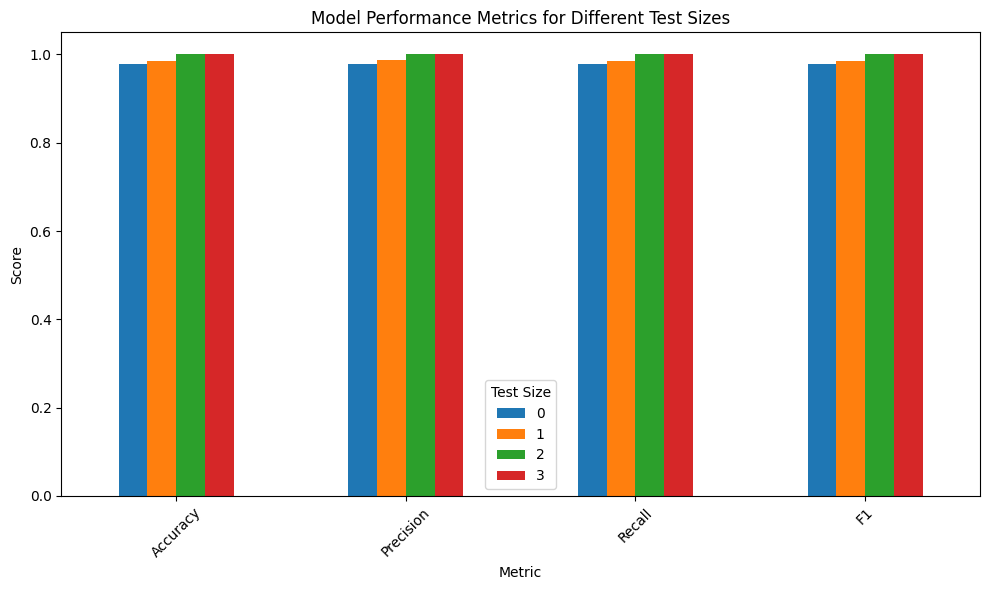

In [ ]:
import matplotlib.pyplot as plt

results_df_t = results_df.drop('Test Size', axis=1)
results_df_t = results_df_t.T

results_df_t.plot(kind='bar', figsize=(10, 6))

plt.title('Model Performance Metrics for Different Test Sizes')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Test Size')
plt.tight_layout()

plt.show()


=== PCA with Random Forest ===

--- PCA 50:50 ---
Best Parameters: {'criterion': 'gini'}
              precision    recall  f1-score   support

     class_0       0.97      0.93      0.95        30
     class_1       0.89      0.94      0.92        35
     class_2       0.96      0.92      0.94        24

    accuracy                           0.93        89
   macro avg       0.94      0.93      0.93        89
weighted avg       0.93      0.93      0.93        89



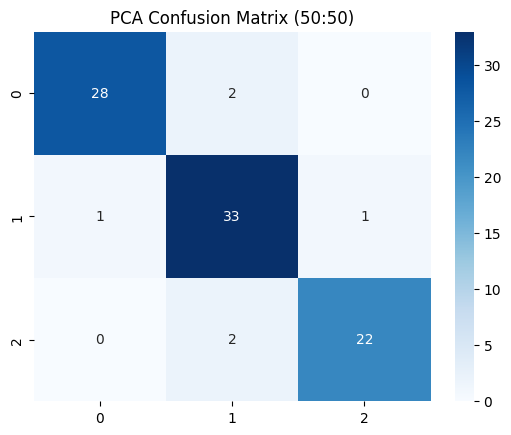


--- PCA 60:40 ---
Best Parameters: {'criterion': 'gini'}
              precision    recall  f1-score   support

     class_0       0.96      0.92      0.94        24
     class_1       0.88      0.97      0.92        29
     class_2       1.00      0.89      0.94        19

    accuracy                           0.93        72
   macro avg       0.94      0.93      0.93        72
weighted avg       0.94      0.93      0.93        72



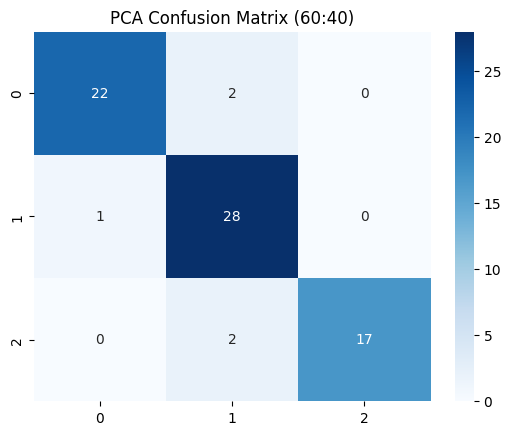


--- PCA 70:30 ---
Best Parameters: {'criterion': 'gini'}
              precision    recall  f1-score   support

     class_0       1.00      0.94      0.97        18
     class_1       0.88      1.00      0.93        21
     class_2       1.00      0.87      0.93        15

    accuracy                           0.94        54
   macro avg       0.96      0.94      0.94        54
weighted avg       0.95      0.94      0.94        54



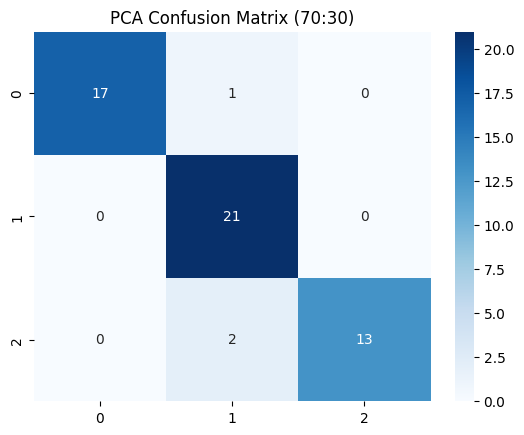


--- PCA 80:20 ---
Best Parameters: {'criterion': 'gini'}
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       0.88      1.00      0.93        14
     class_2       1.00      0.80      0.89        10

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



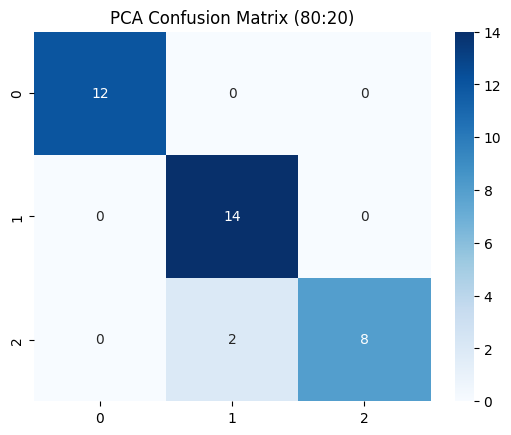

In [ ]:
print("\n=== PCA with Random Forest ===")

pca = PCA(n_components=10)
X_reduced = pca.fit_transform(X)

for test_size in splits:
    print(f"\n--- PCA {int((1-test_size)*100)}:{int(test_size*100)} ---")
    X_train, X_test, y_train, y_test = train_test_split(
        X_reduced, y, test_size=test_size, random_state=42, stratify=y
    )

    rf = RandomForestClassifier(random_state=42)

    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    param_grid = {
        'criterion': ['gini', 'entropy', 'log_loss'],
        # 'max_depth': [2, 3, 4, 5, 6],
        # 'min_samples_split': [2, 3, 4, 5],
        # 'min_samples_leaf': [1, 2, 3, 4, 5],
        # 'max_leaf_nodes': [2,3,4,5,6,7],
        # 'max_features': [None, 'sqrt', 'log2']
    }

    grid = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    print("Best Parameters:", grid.best_params_)

    y_pred = best_model.predict(X_test)

    print(classification_report(y_test, y_pred))

    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"PCA Confusion Matrix ({int((1-test_size)*100)}:{int(test_size*100)})")
    plt.show()


# **DIGITS DATASET**

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()

In [ ]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.3, shuffle=False
)

In [ ]:
data.shape

(1797, 64)

In [ ]:
# Classifier
classifier = RandomForestClassifier(criterion='gini', max_depth=20, max_features='sqrt')

# Fit
classifier.fit(X_train, y_train)

# Predict
y_pred = classifier.predict(X_test)

print("\nConfusion Matrix")
print(confusion_matrix(y_test, y_pred))

print("------------------------------------------------------")
print("Classification Report")
print(classification_report(y_test, y_pred))


Confusion Matrix
[[52  0  0  0  1  0  0  0  0  0]
 [ 0 45  0  2  0  1  0  0  0  5]
 [ 1  0 46  5  0  0  0  0  0  1]
 [ 0  1  0 42  0  2  0  2  6  0]
 [ 0  0  0  0 54  0  0  2  0  1]
 [ 0  0  0  0  0 55  1  0  0  0]
 [ 0  1  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  0]
 [ 0  4  0  0  0  0  0  2 45  1]
 [ 0  0  0  0  0  2  0  0  1 52]]
------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.88      0.85      0.87        53
           2       1.00      0.87      0.93        53
           3       0.86      0.79      0.82        53
           4       0.98      0.95      0.96        57
           5       0.92      0.98      0.95        56
           6       0.98      0.98      0.98        54
           7       0.90      1.00      0.95        54
           8       0.87      0.87      0.87        52
           9       0.87      0.95

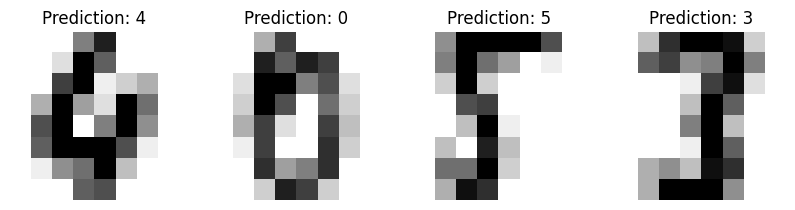

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, y_pred):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

**Visualisation**


=== Train-Test Split: 50:50 ===
Best Parameters: {'criterion': 'entropy'}
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        88
           1       0.93      0.92      0.93        91
           2       0.97      0.91      0.94        86
           3       0.92      0.86      0.89        91
           4       0.98      0.92      0.95        92
           5       0.88      0.91      0.90        91
           6       0.97      1.00      0.98        91
           7       0.95      0.97      0.96        89
           8       0.89      0.86      0.88        88
           9       0.85      0.96      0.90        92

    accuracy                           0.93       899
   macro avg       0.93      0.93      0.93       899
weighted avg       0.93      0.93      0.93       899



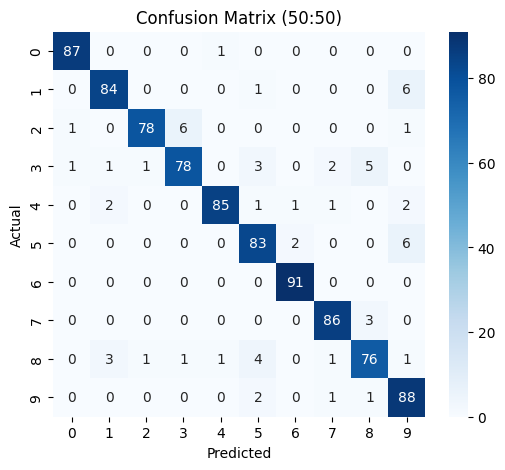

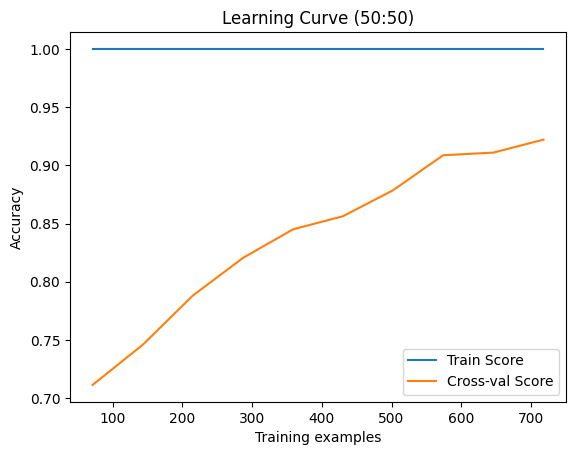

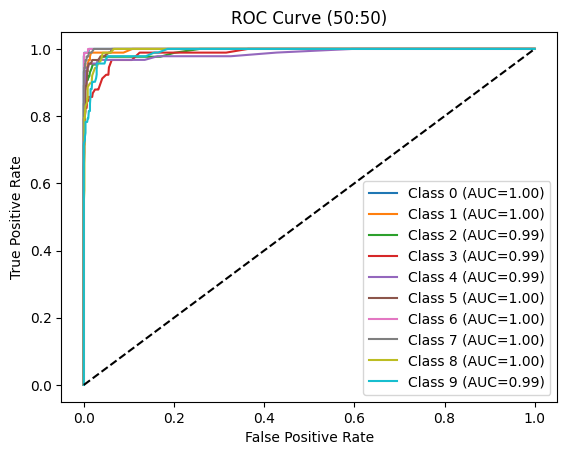


=== Train-Test Split: 60:40 ===
Best Parameters: {'criterion': 'entropy'}
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.94      0.88      0.91        73
           2       0.99      0.93      0.96        71
           3       0.95      0.82      0.88        74
           4       0.96      0.95      0.95        74
           5       0.89      0.96      0.93        71
           6       0.97      1.00      0.99        74
           7       0.96      0.97      0.97        72
           8       0.84      0.93      0.88        68
           9       0.88      0.94      0.91        71

    accuracy                           0.94       719
   macro avg       0.94      0.94      0.94       719
weighted avg       0.94      0.94      0.94       719



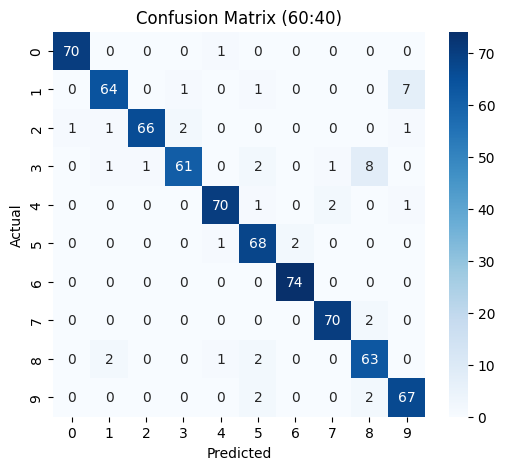

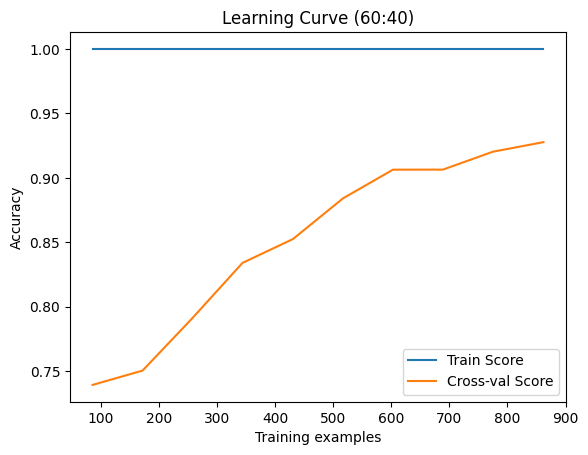

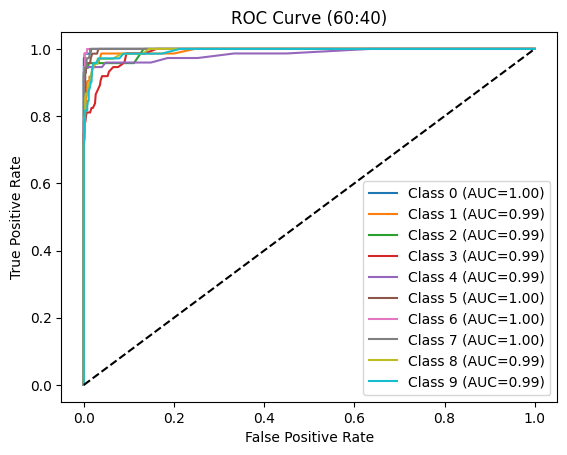


=== Train-Test Split: 70:30 ===
Best Parameters: {'criterion': 'entropy'}
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.92      0.85      0.88        53
           2       1.00      0.87      0.93        53
           3       0.88      0.81      0.84        53
           4       0.95      0.95      0.95        57
           5       0.90      0.95      0.92        56
           6       0.98      0.98      0.98        54
           7       0.91      0.98      0.95        54
           8       0.85      0.90      0.88        52
           9       0.87      0.95      0.90        55

    accuracy                           0.92       540
   macro avg       0.92      0.92      0.92       540
weighted avg       0.92      0.92      0.92       540



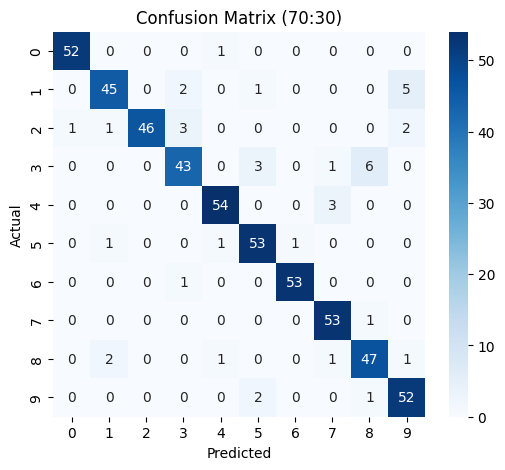

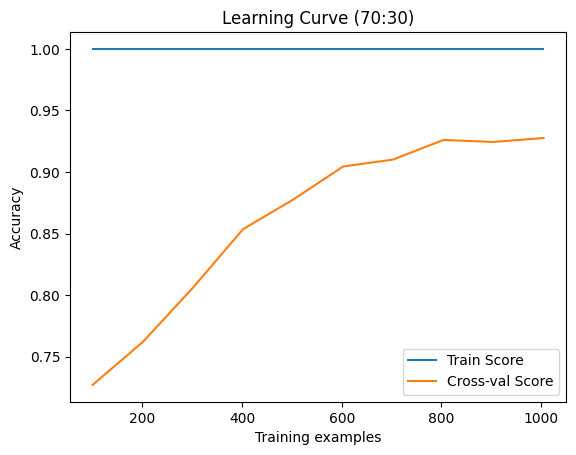

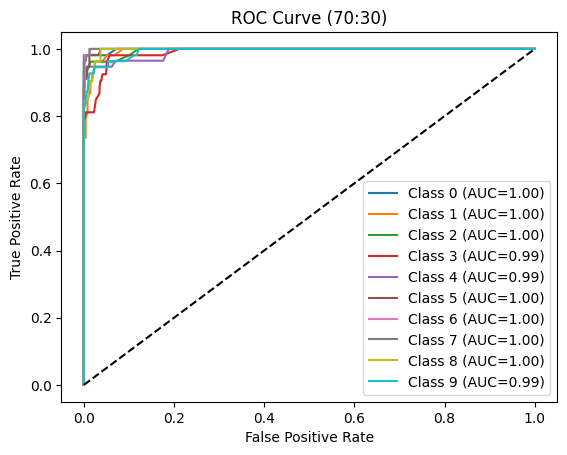


=== Train-Test Split: 80:20 ===
Best Parameters: {'criterion': 'entropy'}
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.94      0.92      0.93        36
           2       1.00      1.00      1.00        35
           3       1.00      0.78      0.88        37
           4       0.94      0.92      0.93        37
           5       0.90      0.95      0.92        37
           6       0.97      1.00      0.99        37
           7       0.92      0.97      0.95        36
           8       0.78      0.85      0.81        33
           9       0.85      0.92      0.88        37

    accuracy                           0.93       360
   macro avg       0.93      0.93      0.93       360
weighted avg       0.93      0.93      0.93       360



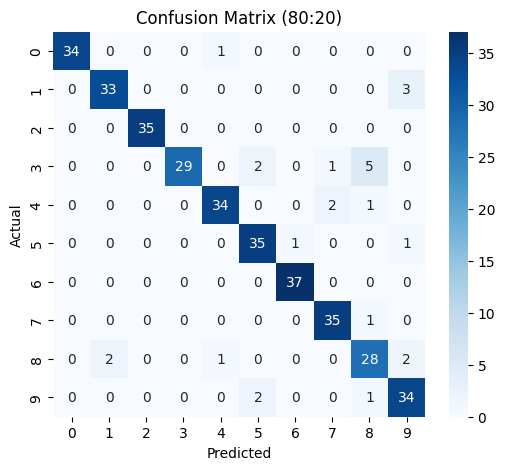

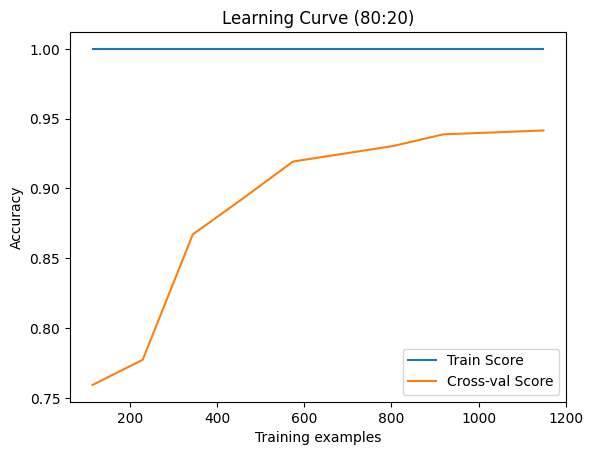

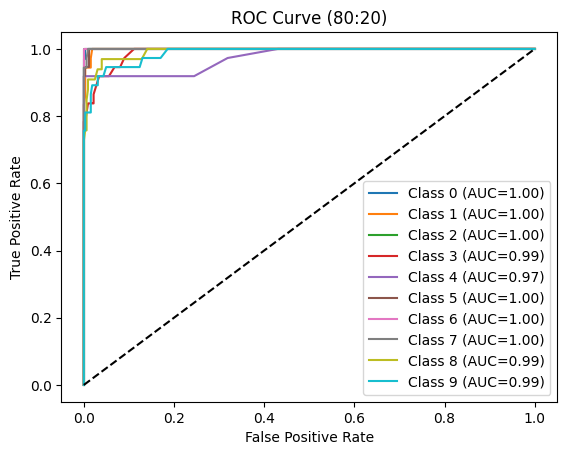

,Test Size,Accuracy,Precision,Recall,F1
0,0.5,0.929922,0.931348,0.929922,0.929898
1,0.4,0.936022,0.938065,0.936022,0.935930
2,0.3,0.922222,0.923957,0.922222,0.921943
3,0.2,0.927778,0.931648,0.927778,0.927878


In [ ]:
splits = [0.5, 0.4, 0.3, 0.2]
results = []

for test_size in splits:
    print(f"\n=== Train-Test Split: {int((1-test_size)*100)}:{int(test_size*100)} ===")

    X_train, X_test, y_train, y_test = train_test_split(
        data, digits.target, test_size=test_size, shuffle=False
    )

    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    # Train
    rf = RandomForestClassifier(random_state=42)

    param_grid = {
        'criterion': ['gini', 'entropy', 'log_loss'],
        # 'max_depth': [2, 3, 4, 5, 6],
        # 'min_samples_split': [2, 3, 4, 5],
        # 'min_samples_leaf': [1, 2, 3, 4, 5],
        # 'max_leaf_nodes': [2,3,4,5,6,7],
        # 'max_features': [None, 'sqrt', 'log2']
    }

    grid = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    print("Best Parameters:", grid.best_params_)

    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="weighted")
    rec = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    results.append([test_size, acc, prec, rec, f1])

    print(classification_report(y_test, y_pred))

    # Confusion Matrix Heatmap
    plt.figure(figsize=(6,5))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix ({int((1-test_size)*100)}:{int(test_size*100)})")
    plt.xlabel("Predicted"); plt.ylabel("Actual")
    plt.show()

    # Learning Curve
    train_sizes, train_scores, test_scores = learning_curve(
        rf, X_train, y_train, cv=5, scoring="accuracy", n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10)
    )
    plt.figure()
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Train Score")
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Cross-val Score")
    plt.title(f"Learning Curve ({int((1-test_size)*100)}:{int(test_size*100)})")
    plt.xlabel("Training examples"); plt.ylabel("Accuracy")
    plt.legend(); plt.show()

    # ROC Curve
    fpr, tpr, roc_auc = {}, {}, {}
    for i, cls in enumerate(best_model.classes_):
        fpr[i], tpr[i], _ = roc_curve(y_test == cls, y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    for i, cls in enumerate(best_model.classes_):
        plt.plot(fpr[i], tpr[i], label=f"Class {cls} (AUC={roc_auc[i]:.2f})")
    plt.plot([0,1],[0,1],"k--")
    plt.title(f"ROC Curve ({int((1-test_size)*100)}:{int(test_size*100)})")
    plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
    plt.legend(); plt.show()

# Summary table
import pandas as pd
results_df = pd.DataFrame(results, columns=["Test Size", "Accuracy", "Precision", "Recall", "F1"])
display(results_df)

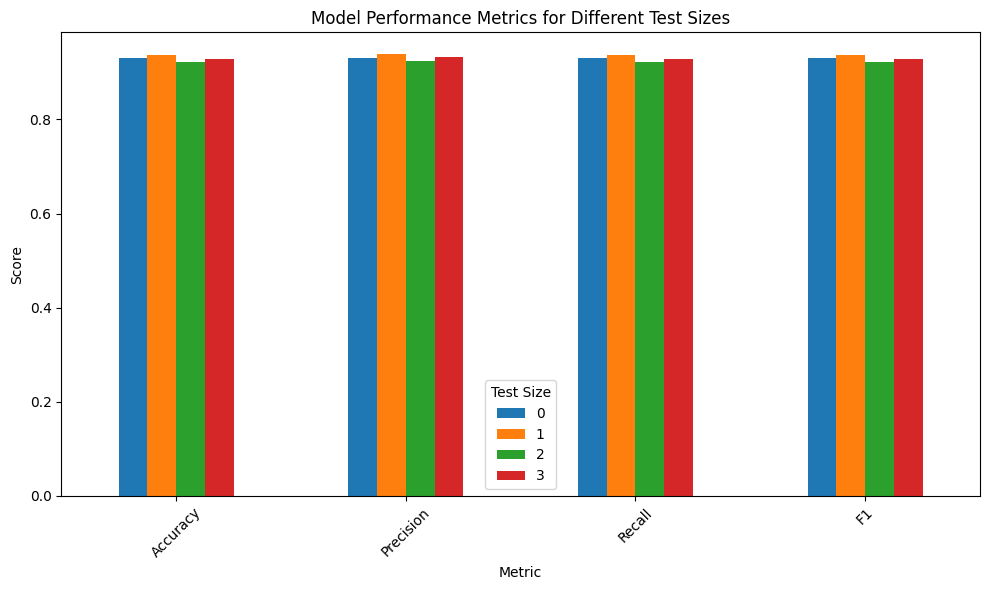

In [ ]:
import matplotlib.pyplot as plt

results_df_t = results_df.drop('Test Size', axis=1)
results_df_t = results_df_t.T

results_df_t.plot(kind='bar', figsize=(10, 6))

plt.title('Model Performance Metrics for Different Test Sizes')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Test Size')
plt.tight_layout()

plt.show()


--- PCA 50:50 ---
Best Parameters: {'criterion': 'gini'}
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        88
           1       0.92      0.92      0.92        91
           2       0.90      0.88      0.89        86
           3       0.81      0.88      0.84        91
           4       0.95      0.96      0.95        92
           5       0.87      0.95      0.91        91
           6       0.99      0.97      0.98        91
           7       0.95      0.97      0.96        89
           8       0.91      0.70      0.79        88
           9       0.85      0.90      0.87        92

    accuracy                           0.91       899
   macro avg       0.91      0.91      0.91       899
weighted avg       0.91      0.91      0.91       899



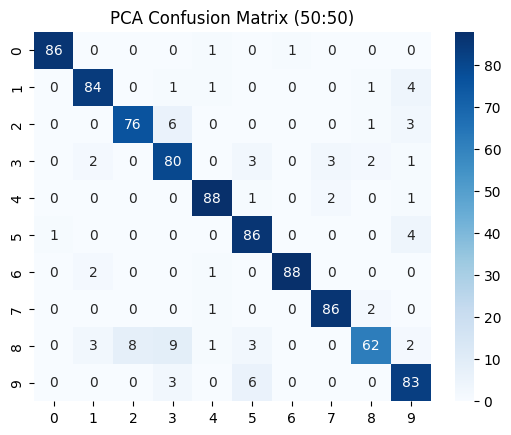


--- PCA 60:40 ---
Best Parameters: {'criterion': 'gini'}
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        71
           1       0.94      0.92      0.93        73
           2       0.97      0.85      0.90        71
           3       0.82      0.85      0.83        74
           4       0.96      0.95      0.95        74
           5       0.81      0.99      0.89        71
           6       0.96      0.97      0.97        74
           7       0.90      0.97      0.93        72
           8       0.90      0.82      0.86        68
           9       0.91      0.87      0.89        71

    accuracy                           0.91       719
   macro avg       0.92      0.91      0.91       719
weighted avg       0.92      0.91      0.91       719



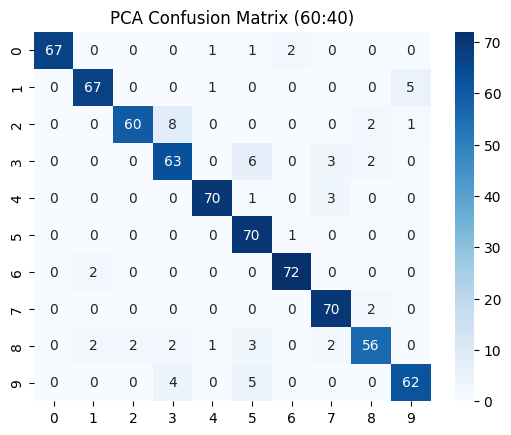


--- PCA 70:30 ---
Best Parameters: {'criterion': 'gini'}
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        53
           1       0.85      0.89      0.87        53
           2       0.98      0.89      0.93        53
           3       0.81      0.83      0.82        53
           4       0.95      0.95      0.95        57
           5       0.86      1.00      0.93        56
           6       0.96      0.96      0.96        54
           7       0.90      0.96      0.93        54
           8       0.91      0.79      0.85        52
           9       0.89      0.87      0.88        55

    accuracy                           0.91       540
   macro avg       0.91      0.91      0.91       540
weighted avg       0.91      0.91      0.91       540



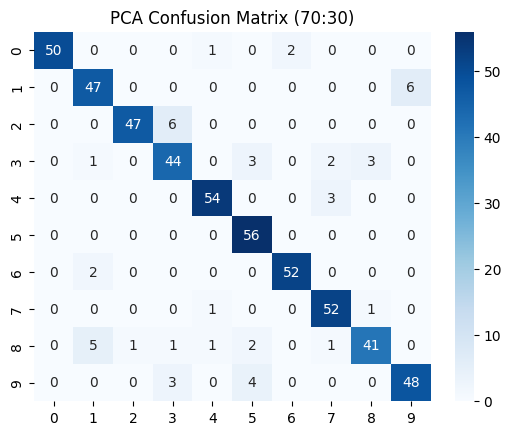


--- PCA 80:20 ---
Best Parameters: {'criterion': 'gini'}
              precision    recall  f1-score   support

           0       1.00      0.91      0.96        35
           1       0.87      0.94      0.91        36
           2       1.00      1.00      1.00        35
           3       0.90      0.73      0.81        37
           4       0.87      0.92      0.89        37
           5       0.82      1.00      0.90        37
           6       1.00      0.97      0.99        37
           7       0.87      0.94      0.91        36
           8       0.84      0.82      0.83        33
           9       0.91      0.81      0.86        37

    accuracy                           0.91       360
   macro avg       0.91      0.91      0.90       360
weighted avg       0.91      0.91      0.90       360



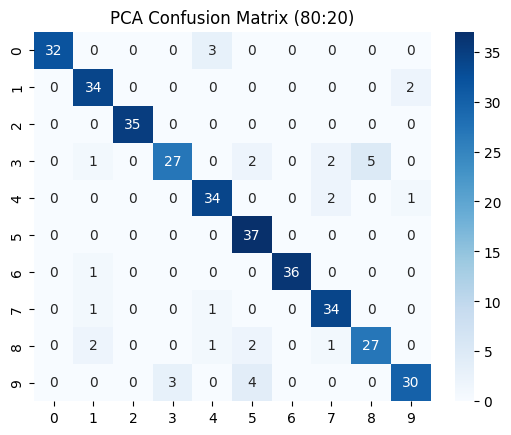

In [ ]:
pca = PCA(n_components=10)
X_reduced = pca.fit_transform(data)

for test_size in splits:
    print(f"\n--- PCA {int((1-test_size)*100)}:{int(test_size*100)} ---")
    X_train, X_test, y_train, y_test = train_test_split(
        X_reduced, digits.target, test_size=test_size, shuffle=False
    )

    rf = RandomForestClassifier(random_state=42)

    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    param_grid = {
        'criterion': ['gini', 'entropy', 'log_loss'],
        # 'max_depth': [2, 3, 4, 5, 6],
        # 'min_samples_split': [2, 3, 4, 5],
        # 'min_samples_leaf': [1, 2, 3, 4, 5],
        # 'max_leaf_nodes': [2,3,4,5,6,7],
        # 'max_features': [None, 'sqrt', 'log2']
    }

    grid = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    print("Best Parameters:", grid.best_params_)

    y_pred = best_model.predict(X_test)

    print(classification_report(y_test, y_pred))

    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"PCA Confusion Matrix ({int((1-test_size)*100)}:{int(test_size*100)})")
    plt.show()

In [ ]:
best_accuracy = -1
best_n_components = 0
best_kernel = ""
best_model = None
best_classification_report = ""

for n_components in range(1, 64):
    pca = PCA(n_components=n_components)
    X_reduced = pca.fit_transform(data)

    X_train, X_test, y_train, y_test = train_test_split(
        X_reduced, digits.target, test_size=0.3, shuffle=False
    )

    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    # Train
    rf = RandomForestClassifier()

    param_grid = {
        'criterion': ['gini', 'entropy', 'log_loss'],
        # 'max_depth': [2, 3, 4, 5, 6],
        # 'min_samples_split': [2, 3, 4, 5],
        # 'min_samples_leaf': [1, 2, 3, 4, 5],
        # 'max_leaf_nodes': [2,3,4,5,6,7],
        # 'max_features': [None, 'sqrt', 'log2']
    }


    grid = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)

    best_model_for_this_n = grid.best_estimator_
    best_params = grid.best_params_

    y_pred = best_model_for_this_n.predict(X_test)

    accuracy = grid.best_score_

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_components = n_components
        best_kernel = best_params['kernel']
        best_model = best_model_for_this_n
        best_classification_report = classification_report(y_test, y_pred)

print("\n--- Best Results ---")
print(f"Best PCA n_components: {best_n_components}")
print(f"Best Kernel: {best_kernel}")
print(f"Best Accuracy: {best_accuracy}")
print("Best Classification Report:")
print(best_classification_report)